In [1]:
## pandasを使って収集したデータについて軽く調べてみます。
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt

data = pd.read_csv('match_data_cleaning.csv' ,index_col=0,comment ='#')
data.describe()

,For,Aga,Diff
count,645.000000,645.000000,645.000000
mean,36.269767,14.897674,21.372093
std,17.296423,8.317949,19.737591
min,7.000000,0.000000,0.000000
25%,24.000000,9.000000,6.000000
50%,33.000000,15.000000,16.000000
75%,45.000000,20.000000,31.000000
max,127.000000,39.000000,122.000000


In [2]:
data

,Team,Result,For,Aga,Diff,Hta,Htf,Opposition,Ground,Date
ID,,,,,,,,,,
0,Czechia,won,56,14,42,28,0,v Sweden,Enkoping,3 Sep 2016
2,New Zealand,won,57,22,35,24,19,v Argentina,Hamilton,10 Sep 2016
4,Australia,won,23,17,6,13,14,v South Africa,Brisbane,10 Sep 2016
6,New Zealand,won,41,13,28,15,10,v South Africa,Christchurch,17 Sep 2016
8,Australia,won,36,20,16,21,6,v Argentina,Perth,17 Sep 2016
10,Poland,won,22,0,22,16,0,v Ukraine,Lublin,24 Sep 2016
12,Hungary,won,53,5,48,27,0,v Estonia,Tallin,1 Oct 2016
14,South Africa,won,18,10,8,12,10,v Australia,Pretoria,1 Oct 2016
16,Mexico,won,32,3,29,10,3,v Guyana,Mexico City,1 Oct 2016


In [3]:
temp = data.query("Date == '10 Nov 2018'")
temp

,Team,Result,For,Aga,Diff,Hta,Htf,Opposition,Ground,Date
ID,,,,,,,,,,
1211,Serbia and Montenegro,won,37,10,27,10,10,v Slovakia,Piestany,10 Nov 2018
1213,Russia,won,47,20,27,19,6,v Namibia,Krasnodar,10 Nov 2018
1215,Romania,won,36,6,30,22,3,v Portugal,Baia Mare,10 Nov 2018
1217,Israel,won,34,22,12,17,15,v Cyprus,Paphos,10 Nov 2018
1219,Ukraine,won,48,24,24,30,10,v Hungary,Szazhalombatta,10 Nov 2018
1221,Italy,won,28,17,11,18,7,v Georgia,Firenze,10 Nov 2018
1223,Scotland,won,54,17,37,21,17,v Fiji,Murrayfield,10 Nov 2018
1225,New Zealand,won,16,15,1,10,15,v England,Twickenham,10 Nov 2018
1227,Wales,won,9,6,3,3,3,v Australia,Millennium Stadium,10 Nov 2018


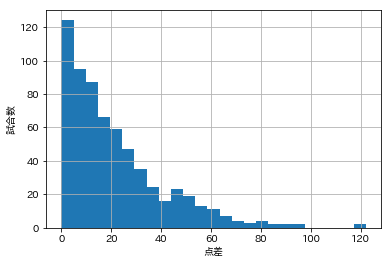

In [41]:
temp = pd.to_numeric(data['Diff'], errors='coerce').dropna()
temp = list(map((lambda x: abs(x)), temp))
plt.hist(temp,bins=25)
plt.xlabel("点差")
plt.ylabel("試合数")
plt.grid()

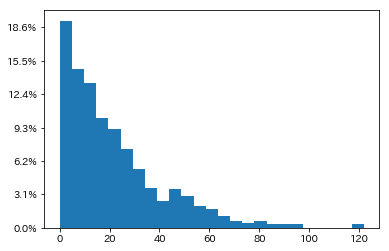

In [5]:
import matplotlib
from numpy.random import randn
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    value = round(100 * y / len(data), 2)
    s = str(value)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

x = temp

# Make a normed histogram. It'll be multiplied by 100 later.
plt.hist(x, bins=25)

# Create the formatter using the function to_percent. This multiplies all the
# default labels by 100, making them all percentages
formatter = FuncFormatter(to_percent)

# Set the formatter
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

In [6]:
def categorize(diff):
    if diff == 0:
        return 0
    if diff <= 3:
        return 0.5
    return round(diff / 7 , 0)

# 関数をテスト
print(categorize(0))
print(categorize(3))
print(categorize(7))
print(categorize(11))

0
0.5
1.0
2.0


In [7]:
temp = pd.to_numeric(data['Diff'], errors='coerce').dropna()
temp = list(map((lambda x: categorize(x)), temp))


array = np.asarray(temp)
pd.unique(array)

array([ 6. ,  5. ,  1. ,  4. ,  2. ,  3. ,  7. , 10. ,  8. ,  9. ,  0.5,
        0. , 13. , 11. , 14. , 12. , 17. ])

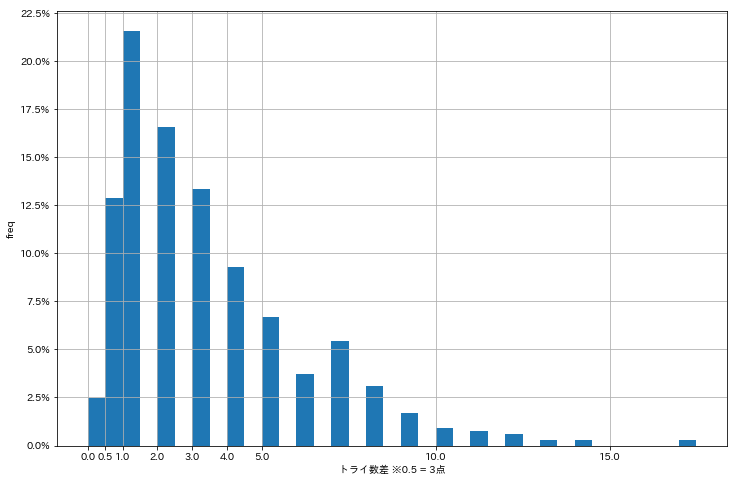

In [20]:
def to_percent(y, position):
    value = round(100 * y / len(array), 2)
    s = str(value)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
edges = x = np.arange(0, 18, 0.5)
n, bins, patches = ax.hist(array, bins=edges)
ax.set_xlabel('トライ数差 ※0.5 = 3点')
ax.set_ylabel('freq')

y_ticks = []
for i in range(10):
    y_ticks.append(len(array) * i * 25 / 1000)

plt.yticks(y_ticks)
plt.xticks([0,0.5,1,2,3,4,5,10,15])
plt.grid()

formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

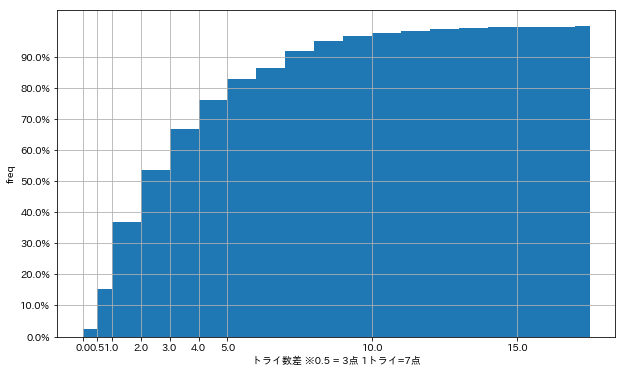

In [17]:
def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    value = round(100 * y / len(array), 2)
    s = str(value)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)
edges = x = np.arange(0, 18, 0.5)
n, bins, patches = ax.hist(array, bins=edges, cumulative=True)
ax.set_xlabel('トライ数差 ※0.5 = 3点 1トライ=7点')
ax.set_ylabel('freq')

y_ticks = []
for i in range(10):
    y_ticks.append(len(array) * i / 10)

plt.yticks(y_ticks)
plt.xticks([0,0.5,1,2,3,4,5,10,15])
plt.grid()
formatter = FuncFormatter(to_percent)

# Set the formatter
plt.gca().yaxis.set_major_formatter(formatter)


plt.show()

In [23]:
temp = data.query("Diff == 122")
temp.head()

,Team,Result,For,Aga,Diff,Hta,Htf,Opposition,Ground,Date
ID,,,,,,,,,,
906,Denmark,won,127,5,122,59,0,v Estonia,Odense,28 Apr 2018


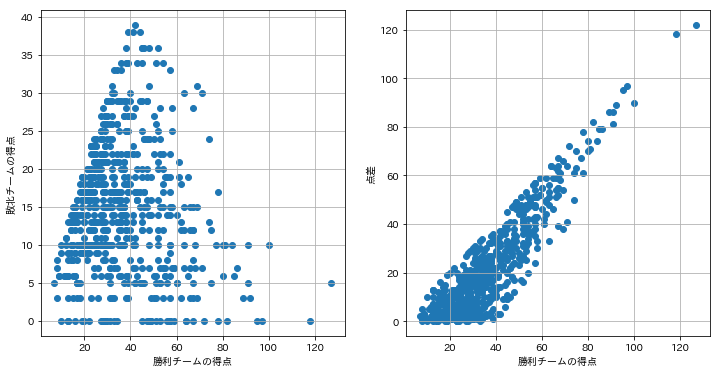

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

lost_team_points = data['Aga']
win_team_points = data['For']
diff_points = data['Diff']

ax[0].set_xlabel('勝利チームの得点')
ax[0].set_ylabel('敗北チームの得点')
ax[0].scatter(win_team_points,lost_team_points)
ax[0].grid()


ax[1].set_xlabel('勝利チームの得点')
ax[1].set_ylabel('点差')
ax[1].scatter(win_team_points,diff_points)
ax[1].grid()